# Lab 4: Fuzzy Foundations & Visualisation
**Student Name:** Michael Ferry

**Student ID**  G00420185

**Date:** 25th February 2026  

**Module:** Artificial Intelligence

## Setup

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3


## 1. Crisp Sets vs. Fuzzy Sets

#### Exercise 1.1: Crisp vs. Fuzzy Tallness

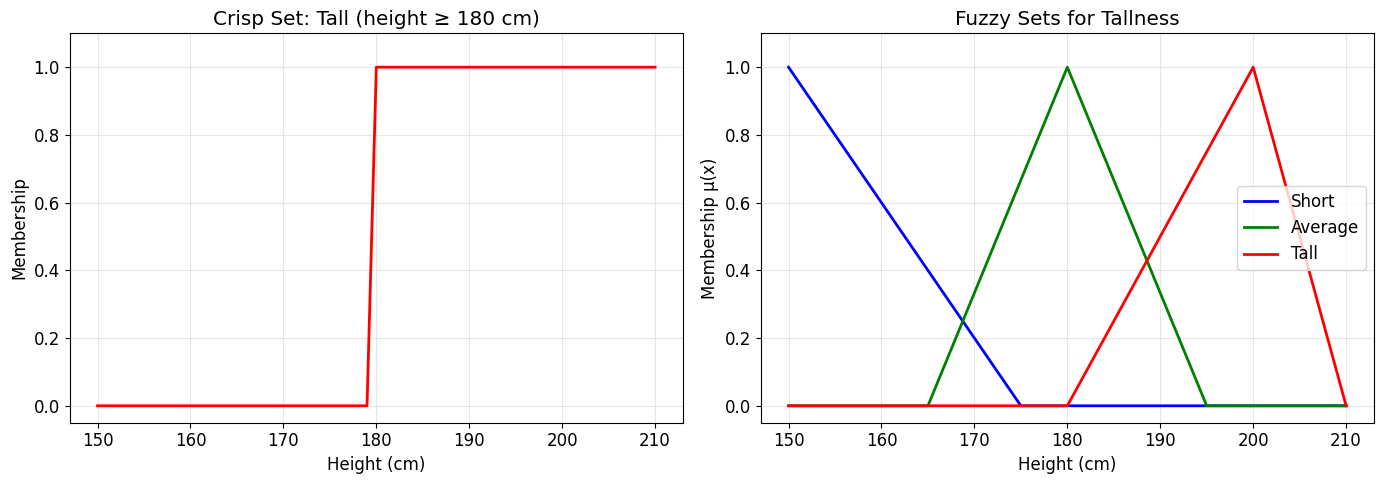

A person who is 184 cm tall:
 μ_average(184) = 0.73
 μ_tall(184) = 0.20
 → Partial membership in MULTIPLE sets simultaneously.


In [2]:
# Universe of discourse: height in cm
x_height = np.arange(150, 211, 1)
# --- Crisp set: tall if height >= 180 ---
crisp_tall = np.where(x_height >= 180, 1.0, 0.0)
# --- Fuzzy sets ---
short = fuzz.trimf(x_height, [150, 150, 175])
average = fuzz.trimf(x_height, [165, 180, 195])
tall = fuzz.trimf(x_height, [180, 200, 210])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Crisp
ax1.plot(x_height, crisp_tall, 'r-', linewidth=2)
ax1.set_title('Crisp Set: Tall (height ≥ 180 cm)')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Membership')
ax1.set_ylim(-0.05, 1.1)
# Fuzzy
ax2.plot(x_height, short, 'b-', linewidth=2, label='Short')
ax2.plot(x_height, average, 'g-', linewidth=2, label='Average')
ax2.plot(x_height, tall, 'r-', linewidth=2, label='Tall')
ax2.set_title('Fuzzy Sets for Tallness')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Membership μ(x)')
ax2.set_ylim(-0.05, 1.1)
ax2.legend()
plt.tight_layout()
plt.show()
# Demonstrate partial membership
height = 184
mu_avg = fuzz.interp_membership(x_height, average, height)
mu_tall = fuzz.interp_membership(x_height, tall, height)
print(f"A person who is {height} cm tall:")
print(f" μ_average({height}) = {mu_avg:.2f}")
print(f" μ_tall({height}) = {mu_tall:.2f}")
print(f" → Partial membership in MULTIPLE sets simultaneously.")


## 2. Common Membership Functions

#### Exercise 2.1: Plot All Four Membership Function Types 

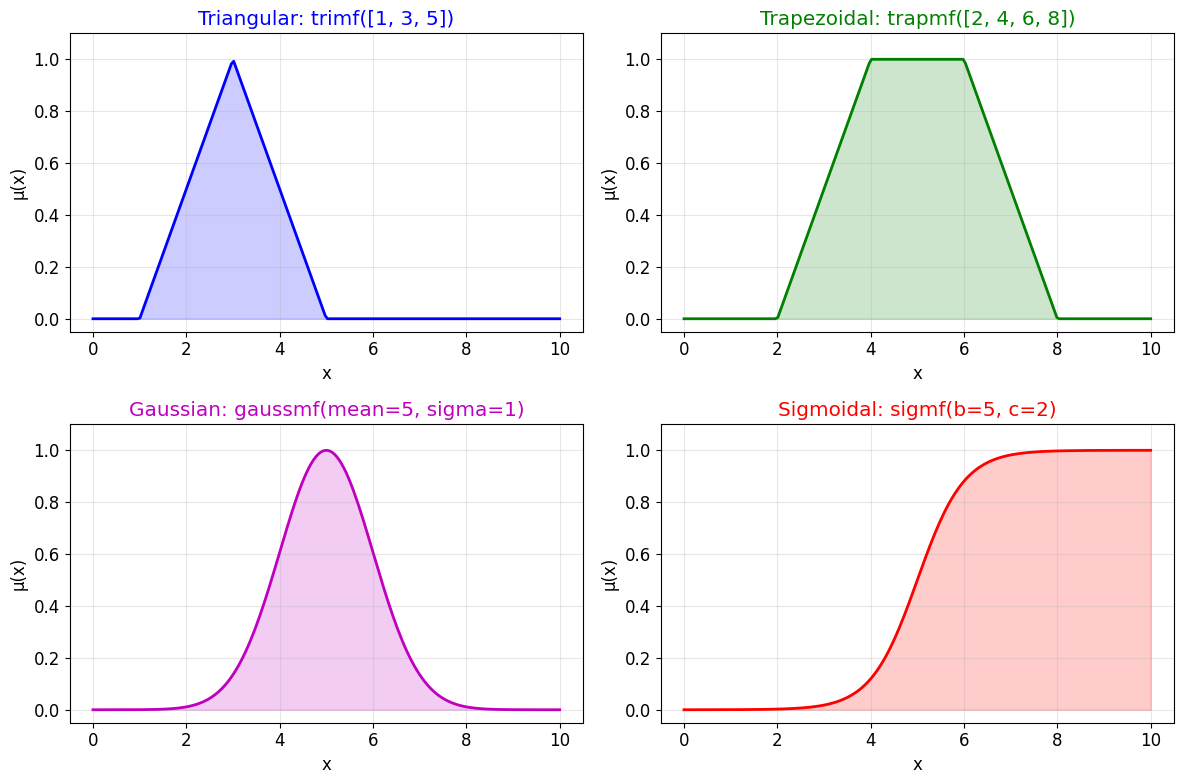

In [3]:
x = np.linspace(0, 10, 200)
# Triangular: peak at 3
mf_tri = fuzz.trimf(x, [1, 3, 5])
# Trapezoidal: plateau from 4 to 6
mf_trap = fuzz.trapmf(x, [2, 4, 6, 8])
# Gaussian: centred at 5, sigma=1
mf_gauss = fuzz.gaussmf(x, 5, 1)
# Sigmoid: inflection at 5, slope=2 (positive = rising)
mf_sig = fuzz.sigmf(x, 5, 2)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x, mf_tri, 'b-', linewidth=2)
axes[0, 0].set_title('Triangular: trimf([1, 3, 5])', color='b')
axes[0, 0].fill_between(x, mf_tri, alpha=0.2, color='b')
axes[0, 1].plot(x, mf_trap, 'g-', linewidth=2)
axes[0, 1].set_title('Trapezoidal: trapmf([2, 4, 6, 8])', color='g')
axes[0, 1].fill_between(x, mf_trap, alpha=0.2, color='g')
axes[1, 0].plot(x, mf_gauss, 'm-', linewidth=2)
axes[1, 0].set_title('Gaussian: gaussmf(mean=5, sigma=1)', color='m')
axes[1, 0].fill_between(x, mf_gauss, alpha=0.2, color='m')
axes[1, 1].plot(x, mf_sig, 'r-', linewidth=2)
axes[1, 1].set_title('Sigmoidal: sigmf(b=5, c=2)', color='r')
axes[1, 1].fill_between(x, mf_sig, alpha=0.2, color='r')
for ax in axes.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('μ(x)')
    ax.set_ylim(-0.05, 1.1)
plt.tight_layout()
plt.show()

#### Exercise 2.2: The Dapping Example — Defining Linguistic Variables

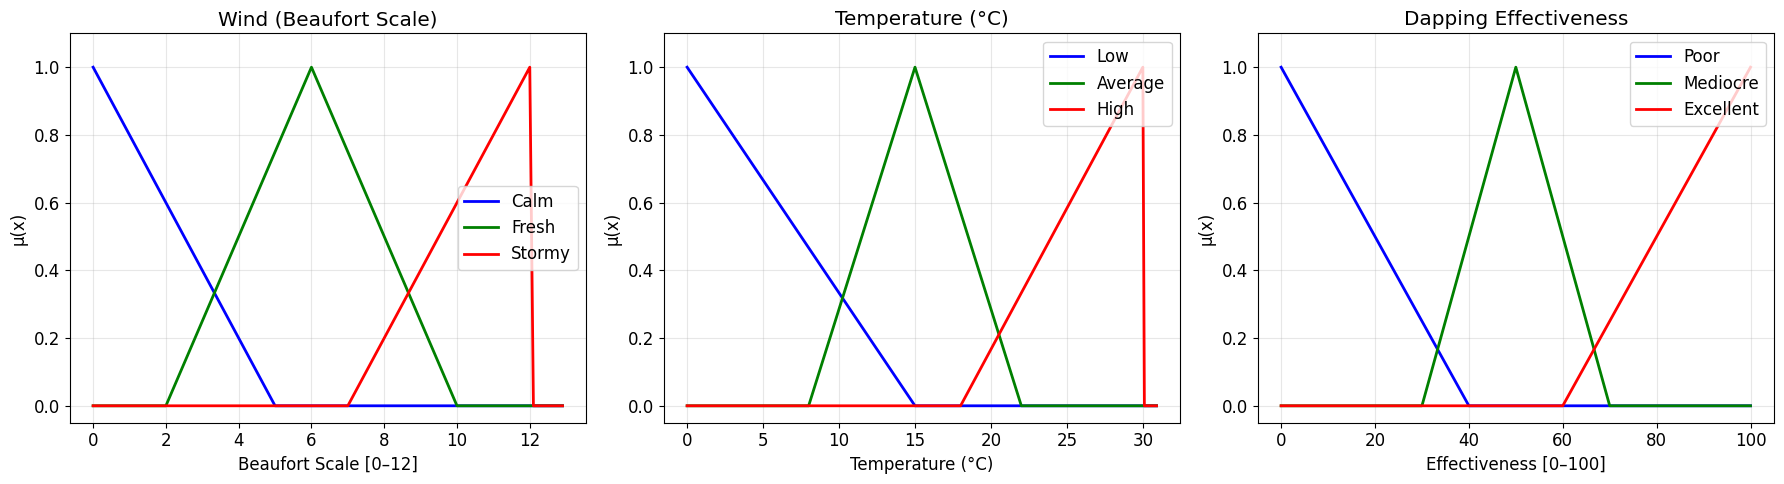

In [4]:
# --- Define universes of discourse ---
x_wind = np.arange(0, 13, 0.1) # Beaufort scale 0-12
x_temp = np.arange(0, 31, 0.1) # Temperature in °C
x_dapping = np.arange(0, 101, 1) # Dapping effectiveness 0-100
# --- Wind membership functions ---
wind_calm = fuzz.trimf(x_wind, [0, 0, 5])
wind_fresh = fuzz.trimf(x_wind, [2, 6, 10])
wind_stormy = fuzz.trimf(x_wind, [7, 12, 12])
# --- Temperature membership functions ---
temp_low = fuzz.trimf(x_temp, [0, 0, 15])
temp_average = fuzz.trimf(x_temp, [8, 15, 22])
temp_high = fuzz.trimf(x_temp, [18, 30, 30])
# --- Dapping membership functions ---
dapping_poor = fuzz.trimf(x_dapping, [0, 0, 40])
dapping_mediocre = fuzz.trimf(x_dapping, [30, 50, 70])
dapping_excellent = fuzz.trimf(x_dapping, [60, 100, 100])
# --- Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Wind
ax1.plot(x_wind, wind_calm, 'b-', linewidth=2, label='Calm')
ax1.plot(x_wind, wind_fresh, 'g-', linewidth=2, label='Fresh')
ax1.plot(x_wind, wind_stormy, 'r-', linewidth=2, label='Stormy')
ax1.set_title('Wind (Beaufort Scale)')
ax1.set_xlabel('Beaufort Scale [0–12]')
ax1.set_ylabel('μ(x)')
ax1.legend()
# Temperature
ax2.plot(x_temp, temp_low, 'b-', linewidth=2, label='Low')
ax2.plot(x_temp, temp_average, 'g-', linewidth=2, label='Average')
ax2.plot(x_temp, temp_high, 'r-', linewidth=2, label='High')
ax2.set_title('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('μ(x)')
ax2.legend()
# Dapping
ax3.plot(x_dapping, dapping_poor, 'b-', linewidth=2, label='Poor')
ax3.plot(x_dapping, dapping_mediocre, 'g-', linewidth=2, label='Mediocre')
ax3.plot(x_dapping, dapping_excellent, 'r-', linewidth=2, label='Excellent')
ax3.set_title('Dapping Effectiveness')
ax3.set_xlabel('Effectiveness [0–100]')
ax3.set_ylabel('μ(x)')
ax3.legend()
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(-0.05, 1.1)
plt.tight_layout()
plt.show()


#### Exercise 2.3: Computing Membership Degrees

In [5]:
# Crisp inputs
wind_val = 8
temp_val = 10
# Fuzzify wind
mu_calm = fuzz.interp_membership(x_wind, wind_calm, wind_val)
mu_fresh = fuzz.interp_membership(x_wind, wind_fresh, wind_val)
mu_stormy = fuzz.interp_membership(x_wind, wind_stormy, wind_val)
# Fuzzify temperature
mu_low = fuzz.interp_membership(x_temp, temp_low, temp_val)
mu_average = fuzz.interp_membership(x_temp, temp_average, temp_val)
mu_high = fuzz.interp_membership(x_temp, temp_high, temp_val)
print(f"Fuzzification for wind = {wind_val}, temperature = {temp_val}")
print(f"{'─' * 45}")
print(f" μ_calm({wind_val}) = {mu_calm:.4f}")
print(f" μ_fresh({wind_val}) = {mu_fresh:.4f}")
print(f" μ_stormy({wind_val}) = {mu_stormy:.4f}")
print()
print(f" μ_low({temp_val}) = {mu_low:.4f}")
print(f" μ_average({temp_val}) = {mu_average:.4f}")
print(f" μ_high({temp_val}) = {mu_high:.4f}")


Fuzzification for wind = 8, temperature = 10
─────────────────────────────────────────────
 μ_calm(8) = 0.0000
 μ_fresh(8) = 0.5000
 μ_stormy(8) = 0.2000

 μ_low(10) = 0.3333
 μ_average(10) = 0.2857
 μ_high(10) = 0.0000


## 3. Hedges — Fuzzy Set Modifiers

#### Exercise 3.1: Implement Hedges from Scratch

In [6]:
def hedge_very(mu):
    """Very: μ^2 (concentration)"""
    return mu ** 2

def hedge_extremely(mu):
    """Extremely: μ^3 (strong concentration)"""
    return mu ** 3

def hedge_very_very(mu):
    """Very very: μ^4 (very strong concentration)"""
    return mu ** 4

def hedge_slightly(mu):
    """Slightly: μ^1.7 (mild concentration)"""
    return mu ** 1.7

def hedge_a_little(mu):
    """A little: μ^1.3 (soft concentration)"""
    return mu ** 1.3

def hedge_more_or_less(mu):
    """More or less: √μ (dilation)"""
    return np.sqrt(mu)

def hedge_somewhat(mu):
    """Somewhat: ∛μ (strong dilation)"""
    return np.cbrt(mu)

def hedge_indeed(mu):
    """Indeed: intensification operator"""
    return np.where(mu <= 0.5, 2 * (mu ** 2), 1 - 2 * ((1 - mu) ** 2))

def hedge_not(mu):
    """NOT: 1 - μ (complement)"""
    return 1 - mu


#### Exercise 3.2: Visualise Hedge Effects

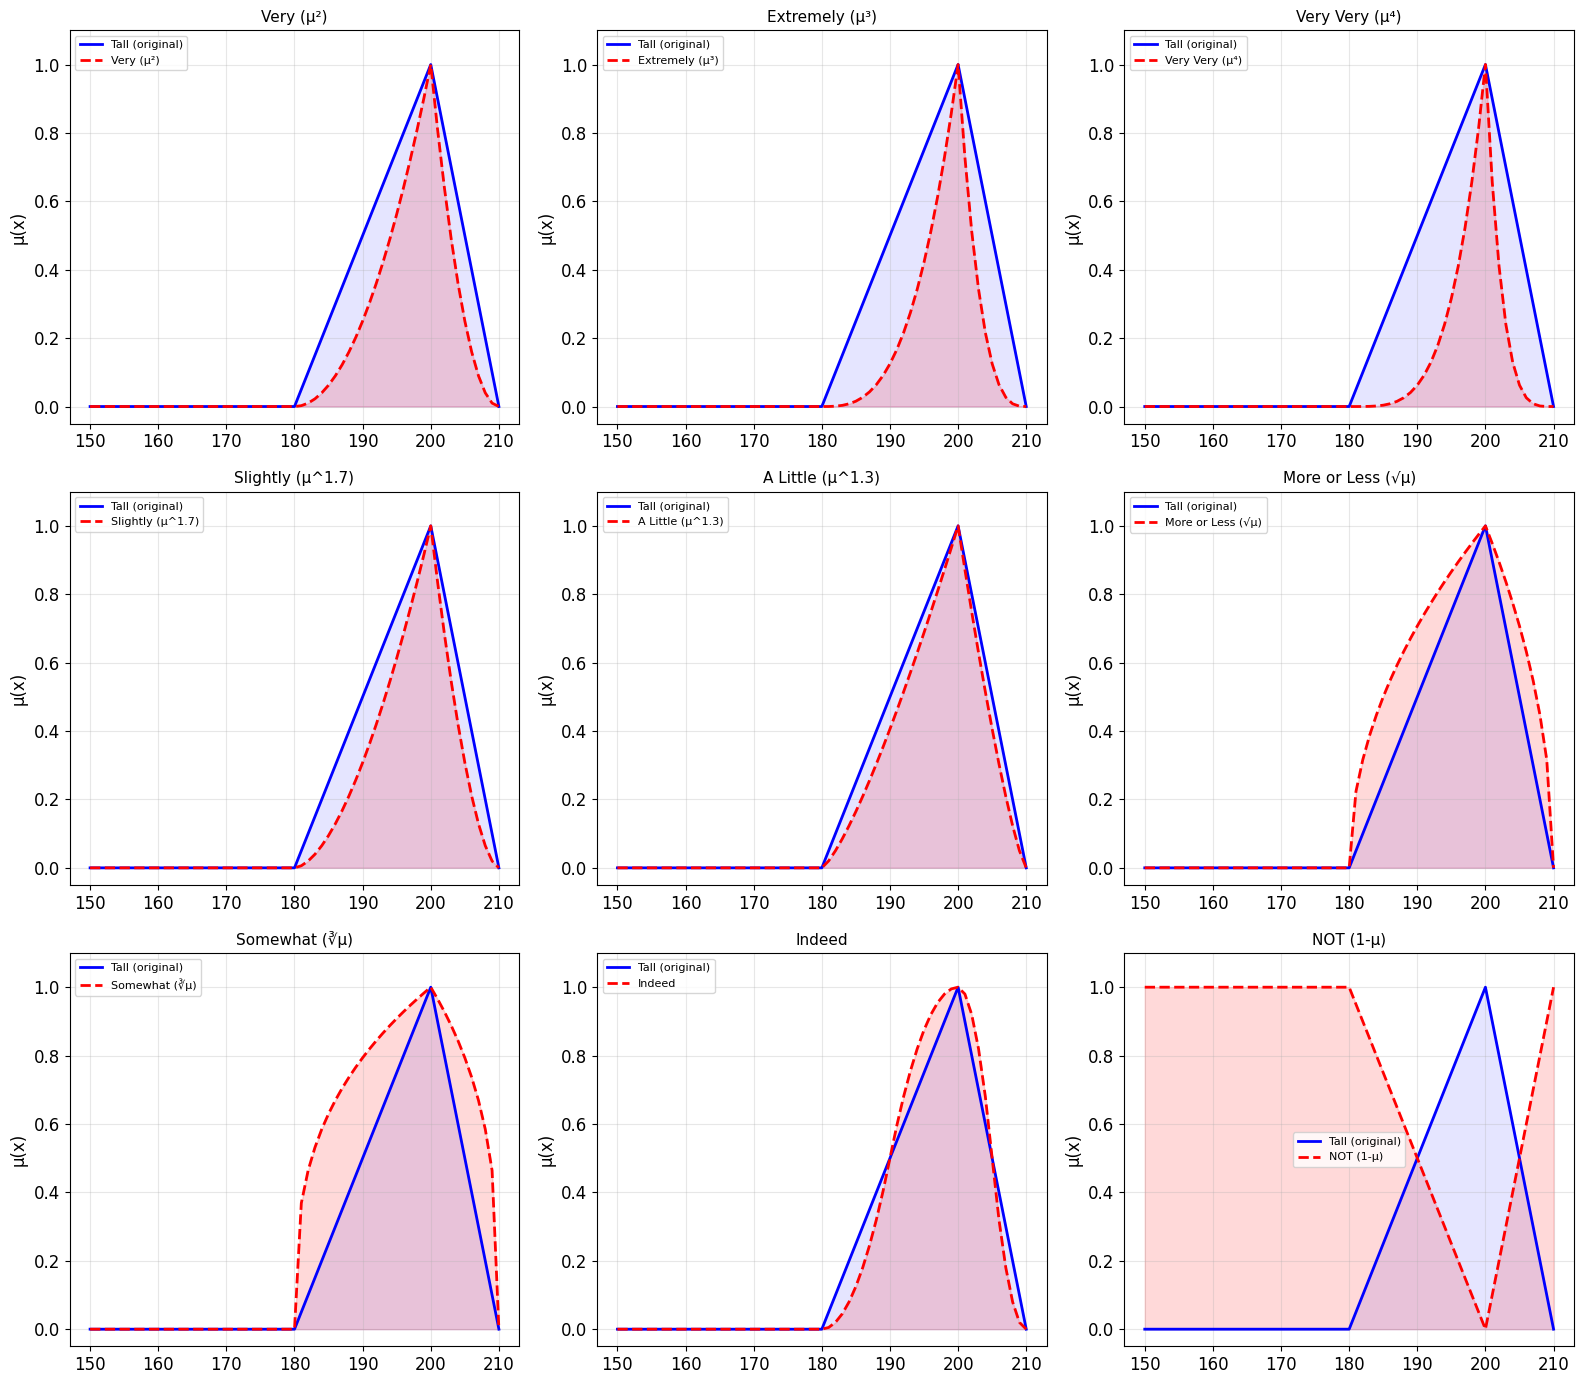

In [7]:
x_height = np.arange(150, 211, 1)
tall = fuzz.trimf(x_height, [180, 200, 210])
hedges = {
 'Very (μ²)': hedge_very,
 'Extremely (μ³)': hedge_extremely,
 'Very Very (μ⁴)': hedge_very_very,
 'Slightly (μ^1.7)': hedge_slightly,
 'A Little (μ^1.3)': hedge_a_little,
 'More or Less (√μ)': hedge_more_or_less,
 'Somewhat (∛μ)': hedge_somewhat,
 'Indeed': hedge_indeed,
 'NOT (1-μ)': hedge_not,
}
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
for ax, (name, func) in zip(axes.flat, hedges.items()):
 hedged = func(tall)
 ax.plot(x_height, tall, 'b-', linewidth=2, label='Tall (original)')
 ax.plot(x_height, hedged, 'r--', linewidth=2, label=name)
 ax.fill_between(x_height, tall, alpha=0.1, color='blue')
 ax.fill_between(x_height, hedged, alpha=0.15, color='red')
 ax.set_title(name, fontsize=11)
 ax.set_ylabel('μ(x)')
 ax.set_ylim(-0.05, 1.1)
 ax.legend(fontsize=8)
plt.tight_layout()
plt.show()


#### Exercise 3.3: Hedge Computations for Practice

In [8]:
mu = 0.86
print(f"Slide verification (μ = {mu}):")
print(f" Very: {hedge_very(mu):.4f} (expected: 0.7396)")
print(f" Extremely: {hedge_extremely(mu):.4f} (expected: 0.6361)")
print(f" Very Very: {hedge_very_very(mu):.4f} (expected: 0.5470)")
print(f" More or Less: {hedge_more_or_less(mu):.4f} (expected: 0.9274)")
print()
mu = 0.5
print(f"Dapping example (μ_stormy(8) = {mu}):")
print(f" Slightly stormy: {hedge_slightly(mu):.4f} → μ^1.7")
print()
mu = 0.3
print(f"Dapping example (μ_low(10) = {mu}):")
print(f" Very low: {hedge_very(mu):.4f} → μ^2 = 0.09")
print()
mu = 0.7
print(f"Dapping example (μ_average(10) = {mu}):")
print(f" More or less avg: {hedge_more_or_less(mu):.4f} → √0.7 ≈ 0.8367")

Slide verification (μ = 0.86):
 Very: 0.7396 (expected: 0.7396)
 Extremely: 0.6361 (expected: 0.6361)
 Very Very: 0.5470 (expected: 0.5470)
 More or Less: 0.9274 (expected: 0.9274)

Dapping example (μ_stormy(8) = 0.5):
 Slightly stormy: 0.3078 → μ^1.7

Dapping example (μ_low(10) = 0.3):
 Very low: 0.0900 → μ^2 = 0.09

Dapping example (μ_average(10) = 0.7):
 More or less avg: 0.8367 → √0.7 ≈ 0.8367


## 4. Fuzzy Set Operations

#### Exercise 4.1: Implement and Visualise Fuzzy Operations

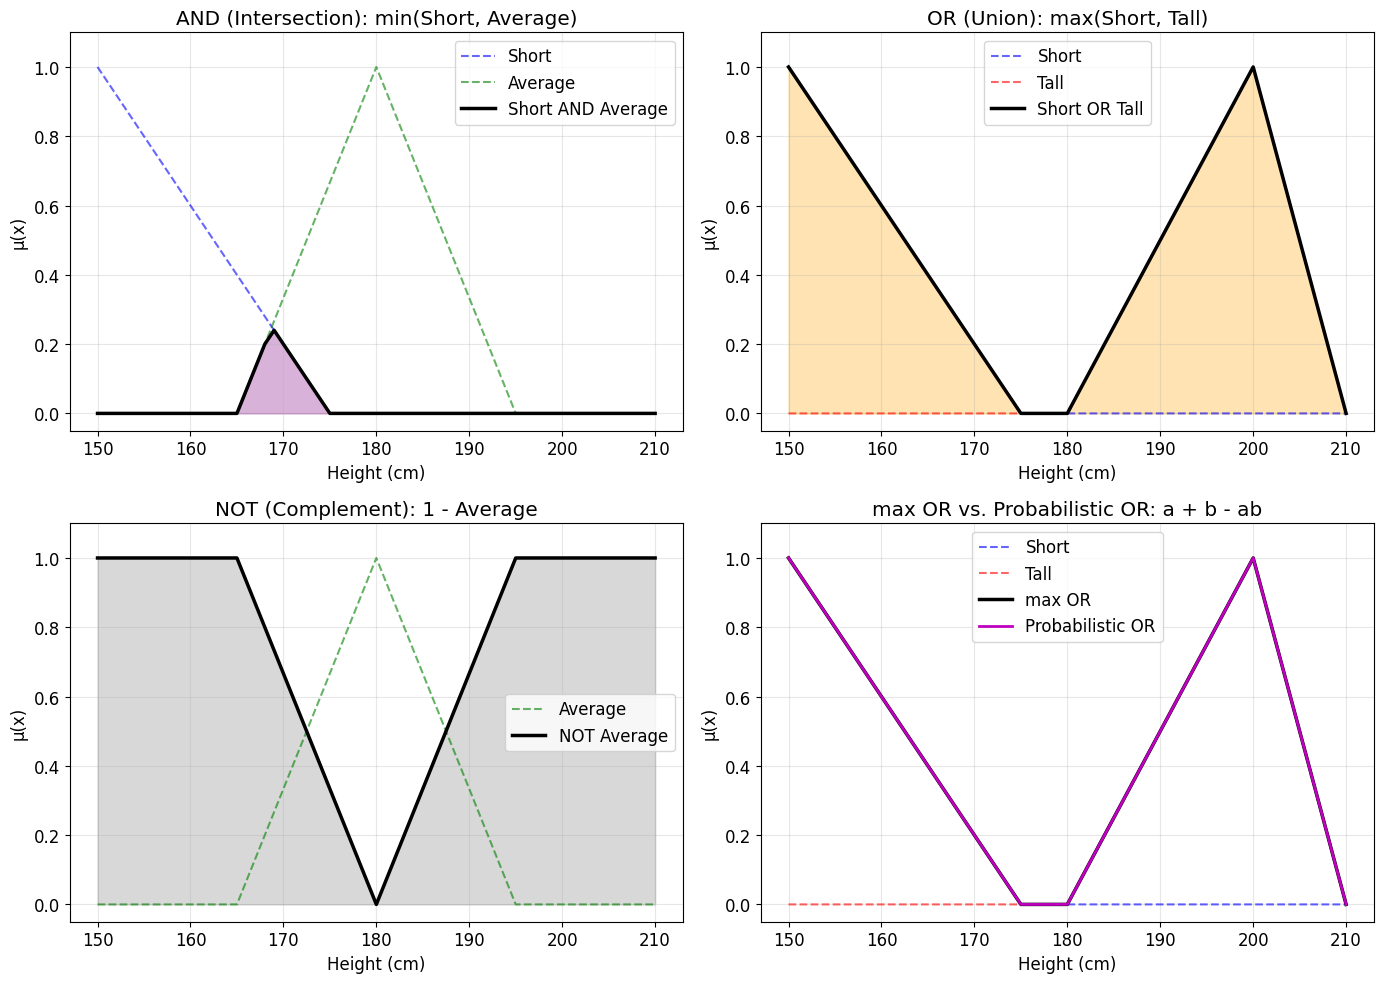

Probabilistic OR vs. max OR at height = 170 cm:
 Short(170) = 0.200, Tall(170) = 0.000
 max OR = 0.200
 prob OR = 0.200
 → When one value is 0, both methods give the same result.

Probabilistic OR vs. max OR at height = 182 cm:
 Short(182) = 0.000, Tall(182) = 0.100
 max OR = 0.100
 prob OR = 0.100


In [9]:
x_height = np.arange(150, 211, 1)
short = fuzz.trimf(x_height, [150, 150, 175])
average = fuzz.trimf(x_height, [165, 180, 195])
tall = fuzz.trimf(x_height, [180, 200, 210])
# Fuzzy operations
and_short_avg = np.minimum(short, average) # AND = min
or_short_tall = np.maximum(short, tall) # OR = max
not_average = 1 - average # NOT = complement
probor_short_tall = short + tall - short * tall # Probabilistic OR
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# AND
axes[0, 0].plot(x_height, short, 'b--', linewidth=1.5, alpha=0.6, label='Short')
axes[0, 0].plot(x_height, average, 'g--', linewidth=1.5, alpha=0.6, label='Average')
axes[0, 0].plot(x_height, and_short_avg, 'k-', linewidth=2.5, label='Short AND Average')
axes[0, 0].fill_between(x_height, and_short_avg, alpha=0.3, color='purple')
axes[0, 0].set_title('AND (Intersection): min(Short, Average)')
axes[0, 0].legend()
# OR
axes[0, 1].plot(x_height, short, 'b--', linewidth=1.5, alpha=0.6, label='Short')
axes[0, 1].plot(x_height, tall, 'r--', linewidth=1.5, alpha=0.6, label='Tall')
axes[0, 1].plot(x_height, or_short_tall, 'k-', linewidth=2.5, label='Short OR Tall')
axes[0, 1].fill_between(x_height, or_short_tall, alpha=0.3, color='orange')
axes[0, 1].set_title('OR (Union): max(Short, Tall)')
axes[0, 1].legend()
# NOT
axes[1, 0].plot(x_height, average, 'g--', linewidth=1.5, alpha=0.6, label='Average')
axes[1, 0].plot(x_height, not_average, 'k-', linewidth=2.5, label='NOT Average')
axes[1, 0].fill_between(x_height, not_average, alpha=0.3, color='gray')
axes[1, 0].set_title('NOT (Complement): 1 - Average')
axes[1, 0].legend()
# Probabilistic OR vs Max OR
axes[1, 1].plot(x_height, short, 'b--', linewidth=1.5, alpha=0.6, label='Short')
axes[1, 1].plot(x_height, tall, 'r--', linewidth=1.5, alpha=0.6, label='Tall')
axes[1, 1].plot(x_height, or_short_tall, 'k-', linewidth=2.5, label='max OR')
axes[1, 1].plot(x_height, probor_short_tall, 'm-', linewidth=2, label='Probabilistic OR')
axes[1, 1].set_title('max OR vs. Probabilistic OR: a + b - ab')
axes[1, 1].legend()
for ax in axes.flat:
    ax.set_xlabel('Height (cm)')
    ax.set_ylabel('μ(x)')
    ax.set_ylim(-0.05, 1.1)
plt.tight_layout()
plt.show()
# Numerical comparison
print("Probabilistic OR vs. max OR at height = 170 cm:")
h = 170
s = fuzz.interp_membership(x_height, short, h)
t = fuzz.interp_membership(x_height, tall, h)
print(f" Short({h}) = {s:.3f}, Tall({h}) = {t:.3f}")
print(f" max OR = {max(s, t):.3f}")
print(f" prob OR = {s + t - s*t:.3f}")
print(" → When one value is 0, both methods give the same result.")
print()
print("Probabilistic OR vs. max OR at height = 182 cm:")
h = 182
s = fuzz.interp_membership(x_height, short, h)
t = fuzz.interp_membership(x_height, tall, h)
print(f" Short({h}) = {s:.3f}, Tall({h}) = {t:.3f}")
print(f" max OR = {max(s, t):.3f}")
print(f" prob OR = {s + t - s*t:.3f}")

## 5. Putting It All Together: Manual Fuzzification with Hedges

#### Exercise 5.1: Dapping Rules with Hedges 

In [10]:
# Step 1: Raw ("visual"/"manual") fuzzification (wind=8, temp=10)
# This approach helps practice for the assessment
# These values come from reading the lecture handout diagrams
mu_stormy = 0.5
mu_fresh = 0.38
mu_low = 0.3
mu_average = 0.7
mu_high = 0.0
print("Step 1: Raw Fuzzification (from lecture handout figures)")
print(f" μ_stormy(8) = {mu_stormy}")
print(f" μ_fresh(8) = {mu_fresh}")
print(f" μ_low(10) = {mu_low}")
print(f" μ_average(10)= {mu_average}")
print(f" μ_high(10) = {mu_high}")
# === Rule 1 ===
print()
print("=" * 60)
print("RULE 1: IF wind IS extremely stormy OR temp IS very low")
print(" THEN dapping IS not very poor")
print("=" * 60)
# Antecedent 1: extremely stormy
extremely_stormy = hedge_extremely(mu_stormy)
print(f" μ_stormy(8) = {mu_stormy}")
print(f" extremely(μ) = μ³ = {mu_stormy}³ = {extremely_stormy:.4f}")
# Antecedent 2: very low
very_low = hedge_very(mu_low)
print(f" μ_low(10) = {mu_low}")
print(f" very(μ) = μ² = {mu_low}² = {very_low:.4f}")
# OR = max
rule1_antecedent = max(extremely_stormy, very_low)
print(f" OR (max) = max({extremely_stormy:.4f}, {very_low:.4f}) = {rule1_antecedent:.4f}")
# Consequent: not very poor
very_rule1 = hedge_very(rule1_antecedent)
not_very_rule1 = hedge_not(very_rule1)
print(f" Consequent: very(μ) = {rule1_antecedent:.4f}² = {very_rule1:.4f}")
print(f" NOT = 1 - {very_rule1:.4f} = {not_very_rule1:.4f}")
print(f" → Rule 1 fires: clip 'poor' at {not_very_rule1:.4f}")
# === Rule 2 ===
print()
print("=" * 60)
print("RULE 2: IF wind IS fresh AND temp IS more or less average")
print(" THEN dapping IS mediocre")
print("=" * 60)
# Antecedent 1: fresh (no hedge)
print(f" μ_fresh(8) = {mu_fresh}")
# Antecedent 2: more or less average
mol_average = hedge_more_or_less(mu_average)
print(f" μ_average(10) = {mu_average}")
print(f" more_or_less(μ) = √μ = √{mu_average} = {mol_average:.4f}")
# AND = min
rule2_antecedent = min(mu_fresh, mol_average)
print(f" AND (min) = min({mu_fresh}, {mol_average:.4f}) = {rule2_antecedent:.4f}")
print(f" → Rule 2 fires: clip 'mediocre' at {rule2_antecedent:.4f}")
# === Rule 3 ===
print()
print("=" * 60)
print("RULE 3: IF wind IS slightly stormy AND temp IS NOT low")
print(" THEN dapping IS a little excellent")
print("=" * 60)
# Antecedent 1: slightly stormy
slightly_stormy = hedge_slightly(mu_stormy)
print(f" μ_stormy(8) = {mu_stormy}")
print(f" slightly(μ) = μ^1.7 = {mu_stormy}^1.7 = {slightly_stormy:.4f}")
# Antecedent 2: NOT low
not_low = hedge_not(mu_low)
print(f" μ_low(10) = {mu_low}")
print(f" NOT = 1 - {mu_low} = {not_low:.4f}")
# AND = min
rule3_antecedent = min(slightly_stormy, not_low)
print(f" AND (min) = min({slightly_stormy:.4f}, {not_low:.4f}) = {rule3_antecedent:.4f}")
# Consequent: a little excellent
a_little_rule3 = hedge_a_little(rule3_antecedent)
print(f" Consequent: a_little(μ) = {rule3_antecedent:.4f}^1.3 = {a_little_rule3:.4f}")
print(f" → Rule 3 fires: clip 'excellent' at {a_little_rule3:.4f}")
print()
print("=" * 60)
print("SUMMARY: These are the values used in the Mamdani handout")
print("=" * 60)
print(f" Rule 1 clips 'poor' at: {not_very_rule1:.4f} (handout: ~1.0)")
print(f" Rule 2 clips 'mediocre' at: {rule2_antecedent:.4f} (handout: 0.38)")
print(f" Rule 3 clips 'excellent' at: {a_little_rule3:.4f} (handout: 0.215)")

Step 1: Raw Fuzzification (from lecture handout figures)
 μ_stormy(8) = 0.5
 μ_fresh(8) = 0.38
 μ_low(10) = 0.3
 μ_average(10)= 0.7
 μ_high(10) = 0.0

RULE 1: IF wind IS extremely stormy OR temp IS very low
 THEN dapping IS not very poor
 μ_stormy(8) = 0.5
 extremely(μ) = μ³ = 0.5³ = 0.1250
 μ_low(10) = 0.3
 very(μ) = μ² = 0.3² = 0.0900
 OR (max) = max(0.1250, 0.0900) = 0.1250
 Consequent: very(μ) = 0.1250² = 0.0156
 NOT = 1 - 0.0156 = 0.9844
 → Rule 1 fires: clip 'poor' at 0.9844

RULE 2: IF wind IS fresh AND temp IS more or less average
 THEN dapping IS mediocre
 μ_fresh(8) = 0.38
 μ_average(10) = 0.7
 more_or_less(μ) = √μ = √0.7 = 0.8367
 AND (min) = min(0.38, 0.8367) = 0.3800
 → Rule 2 fires: clip 'mediocre' at 0.3800

RULE 3: IF wind IS slightly stormy AND temp IS NOT low
 THEN dapping IS a little excellent
 μ_stormy(8) = 0.5
 slightly(μ) = μ^1.7 = 0.5^1.7 = 0.3078
 μ_low(10) = 0.3
 NOT = 1 - 0.3 = 0.7000
 AND (min) = min(0.3078, 0.7000) = 0.3078
 Consequent: a_little(μ) = 0.3078^